In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load Beijing PM2.5 dataset
beijing_data = pd.read_csv("/content/drive/MyDrive/Dataset/beijing.csv")

# Print the shape and first 5 rows of the data
print("Data shape:", beijing_data.shape)
print(beijing_data.head())

# Check for missing values
print("Missing values:\n", beijing_data.isna().sum())

# Create KNN imputer object
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
imputed_data = imputer.fit_transform(beijing_data)

# Convert the imputed data to a dataframe
imputed_data = pd.DataFrame(imputed_data, columns=beijing_data.columns)

# Check for missing values in the imputed data
print("Missing values in imputed data:\n", imputed_data.isna().sum())


Data shape: (43824, 12)
   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0  12.97   0   0
Missing values:
 No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
Iws         0
Is          0
Ir          0
dtype: int64
Missing values in imputed data:
 No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
Iws      0
Is       0
Ir       0
dtype: int64


In [ ]:
imputed_data


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
0,1.0,2010.0,1.0,1.0,0.0,151.0,-21.0,-11.0,1021.0,1.79,0.0,0.0
1,2.0,2010.0,1.0,1.0,1.0,151.0,-21.0,-12.0,1020.0,4.92,0.0,0.0
2,3.0,2010.0,1.0,1.0,2.0,151.0,-21.0,-11.0,1019.0,6.71,0.0,0.0
3,4.0,2010.0,1.0,1.0,3.0,151.0,-21.0,-14.0,1019.0,9.84,0.0,0.0
4,5.0,2010.0,1.0,1.0,4.0,151.0,-20.0,-12.0,1018.0,12.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820.0,2014.0,12.0,31.0,19.0,8.0,-23.0,-2.0,1034.0,231.97,0.0,0.0
43820,43821.0,2014.0,12.0,31.0,20.0,10.0,-22.0,-3.0,1034.0,237.78,0.0,0.0
43821,43822.0,2014.0,12.0,31.0,21.0,10.0,-22.0,-3.0,1034.0,242.70,0.0,0.0
43822,43823.0,2014.0,12.0,31.0,22.0,8.0,-22.0,-4.0,1034.0,246.72,0.0,0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Create a new dataframe with only the 'pm2.5' column 
data = imputed_data.filter(['pm2.5'])
# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .6 ))

window_size = 60
training_data_len

26295

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# create scaler
scaler = StandardScaler()
# fit and transform in one step
scaled_data = scaler.fit_transform(dataset)

print ('scaled_data.shape',len(scaled_data))
scaled_data

scaled_data.shape 43824


array([[ 0.57354471],
       [ 0.57354471],
       [ 0.57354471],
       ...,
       [-0.97243936],
       [-0.99436821],
       [-0.9505105 ]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len)]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i<= window_size + 1:
        print('x_train',x_train)
        print('\ny_train',y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print ('x_train.shape:',x_train.shape)

x_train [array([ 0.57354471,  0.57354471,  0.57354471,  0.57354471,  0.57354471,
        0.57354471,  0.57354471,  0.57354471,  0.40907832,  0.47047911,
        0.58889491,  0.6195953 ,  0.6349455 ,  0.6349455 ,  0.67003166,
        0.57354471,  0.57354471,  0.57354471,  0.57354471,  0.57354471,
        0.41565698,  0.41565698,  0.41565698,  0.36302773,  0.33232734,
        0.54065143,  0.66126012,  0.90247749,  0.43100717,  0.11303882,
        0.06918111,  0.27750521,  0.2336475 ,  0.36522062,  0.45293602,
        0.58450914,  0.54065143,  0.71608225,  0.65029569,  0.60643799,
        0.66126012,  0.71608225,  0.7818688 ,  0.55161586,  0.60643799,
        0.71608225,  0.62836684,  0.29943406, -0.09528528, -0.39132478,
       -0.36939593, -0.47904019, -0.36939593, -0.17203626, -0.08432085,
       -0.13914298, -0.18300068, -0.13914298, -0.22685839, -0.00756987])]

y_train [0.09110996664492543]

x_train [array([ 0.57354471,  0.57354471,  0.57354471,  0.57354471,  0.57354471,
        0.57

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

def build_LSTM_model():
    input = tf.keras.layers.Input(
        shape=(x_train.shape[1], 1), name ="input"
    )
    x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True))(input)
    
    x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences=False, dropout=0.5))(x)
    
    x = tf.keras.layers.Dense(25 , activation="relu", name ="dense_1")(x)
    
    output = tf.keras.layers.Dense(1, name="last_dense")(x)
               
    model = tf.keras.Model(inputs=input, outputs=output)
    
    return model

LSTM_model = build_LSTM_model()
LSTM_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 bidirectional (Bidirectiona  (None, 60, 256)          133120    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
 last_dense (Dense)          (None, 1)                 26        
                                                                 
Total params: 300,723
Trainable params: 300,723
Non-trainable

In [ ]:
epochs = 50
batch_size = 500
early_stopping_patience = 17


# Compile the model
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = LSTM_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50
53/53 [==============================] - 18s 38ms/step - loss: 0.2304
Epoch 2/50
53/53 [==============================] - 2s 37ms/step - loss: 0.0964
Epoch 3/50
53/53 [==============================] - 2s 36ms/step - loss: 0.0864
Epoch 4/50
53/53 [==============================] - 2s 36ms/step - loss: 0.0791
Epoch 5/50
53/53 [==============================] - 2s 36ms/step - loss: 0.0802
Epoch 6/50
53/53 [==============================] - 2s 36ms/step - loss: 0.0748
Epoch 7/50
53/53 [==============================] - 2s 36ms/step - loss: 0.0731
Epoch 8/50
53/53 [==============================] - 2s 37ms/step - loss: 0.0724
Epoch 9/50
53/53 [==============================] - 2s 37ms/step - loss: 0.0704
Epoch 10/50
53/53 [==============================] - 2s 36ms/step - loss: 0.0709
Epoch 11/50
53/53 [==============================] - 2s 36ms/step - loss: 0.0711
Epoch 12/50
53/53 [==============================] - 2s 36ms/step - loss: 0.0704
Epoch 13/50
53/53 [=================

dict_keys(['loss'])


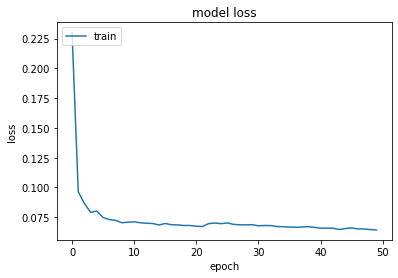

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for loss

fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - window_size: ]
print ('len(test_data):', len(test_data))

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = LSTM_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


len(test_data): 17589
548/548 [==============================] - 4s 5ms/step


<ipython-input-11-315574608bf9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


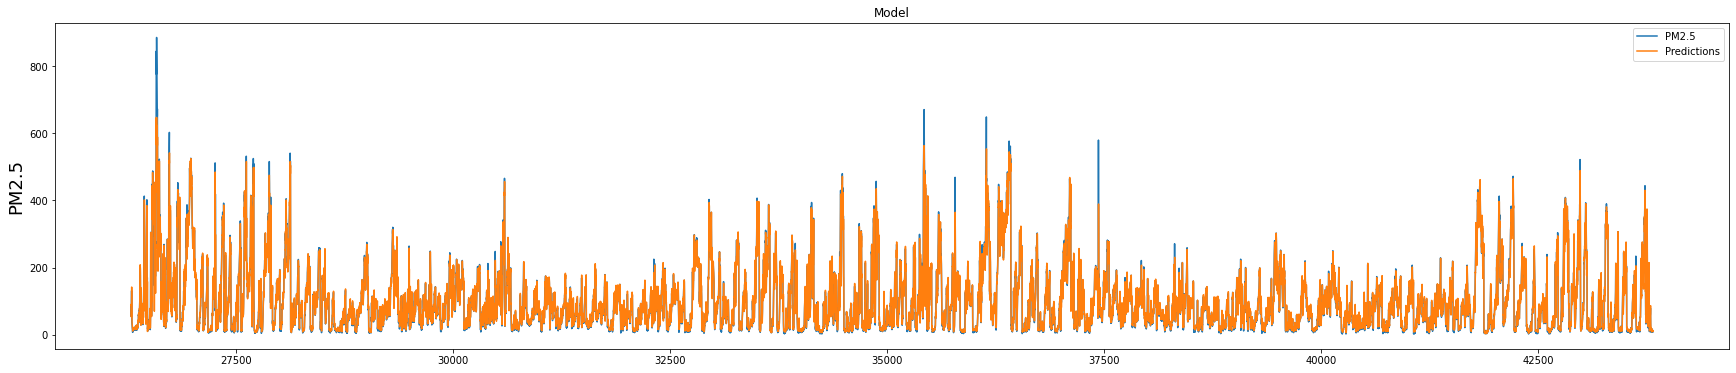

In [ ]:
# Plot the data
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(30,6))
plt.title('Model')
plt.ylabel('PM2.5', fontsize=18)
#plt.plot(train['Close'])
plt.plot(test[['pm2.5', 'Predictions']])
plt.legend(['PM2.5', 'Predictions'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
mae = mean_absolute_error(test['Predictions'],y_test)
mse = mean_squared_error(test['Predictions'], y_test)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test['Predictions'],y_test)
r = r2_score(test['Predictions'], y_test)

In [ ]:
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('R-Squared Score = {}'.format(r))

Mean Absolute Error: 12.414591253802826
Mean Squared Error: 528.2316266110278
Root Mean Squared Error: 22.98329016070214
Mean Absolute Percentage Error: 0.1745550956236528
R-Squared Score = 0.9367970459215436
